<h1> Machine Learning: Libs, data and classification models </h1> 
<div align="left">
<img align="left" src="../extra/me.jpg" height="120" width="120" >
<div></div>
<div><h3>| Carlos H. C. Pena - chcp@cin.ufpe.br</h3></div>
<div><h3>| Master student - Image Segmentation</h3></div>  
<div><h3>| NCR Tech - Research</h3></div>
<div><h3>| RobôCIn - Research</h3></div>
</div>        




<h1> Part One - Theory</h1>

In [1]:
#General Purpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data transform
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE

#Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

#Metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, confusion_matrix, matthews_corrcoef

# Sample Datasets
from sklearn.datasets import load_iris

sns.set_theme()

# Dataset

In [2]:
iris         = load_iris()
iris_data    = iris.data
iris_target  = iris.target
iris_targ_n  = iris['target_names']
iris_targ_n  = iris_targ_n[iris.target]
iris_feat_n  = iris['feature_names']

df = pd.DataFrame(iris_data, columns=iris_feat_n)
df['target'] = iris_targ_n
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


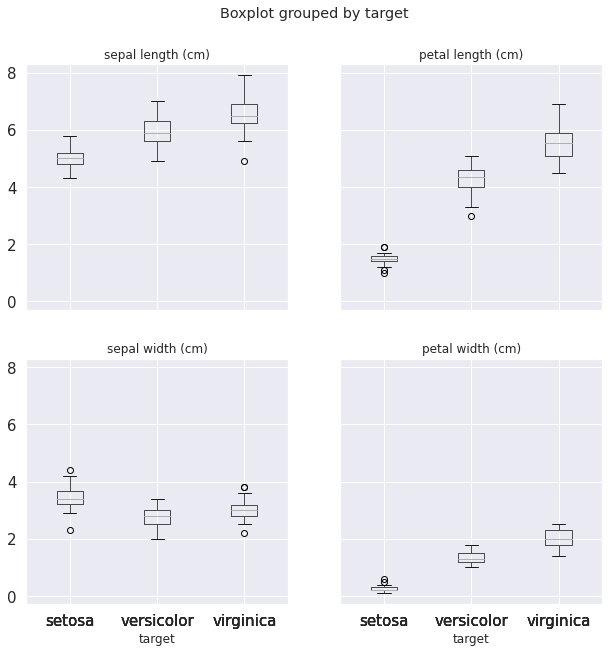

In [3]:
axes = df.boxplot(column=[iris_feat_n[0], iris_feat_n[2], iris_feat_n[1], iris_feat_n[3]], 
                  by='target', figsize=(10, 10), fontsize=15)

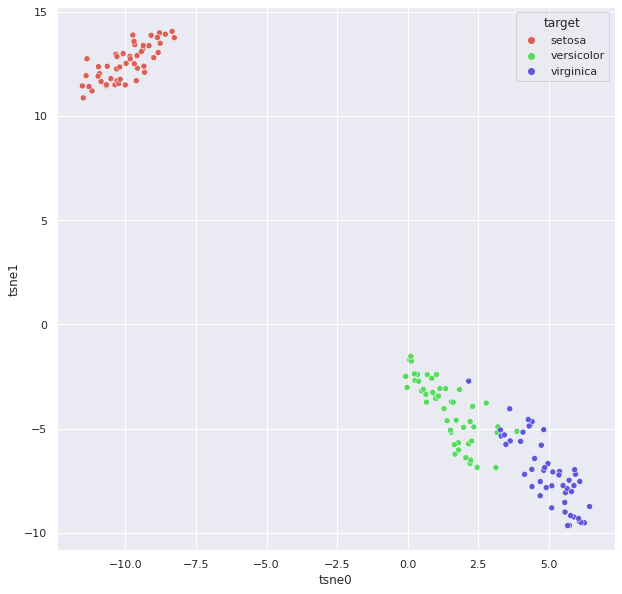

In [4]:
np.random.seed(2021)

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(iris_data)

df['tsne0'] = tsne_results[:, 0]
df['tsne1'] = tsne_results[:, 1]

plt.figure(figsize=(10,10))
sns.scatterplot( x="tsne0", y="tsne1", hue="target",
    palette=sns.color_palette("hls", 3), data=df, 
    legend="full", alpha=1);

# Models

> ### “A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.” - Tom Mitchell 

> Dado uma tarefa T medida por uma métrica P, se a métrica P melhorar com a experiência E é dito que o modelo aprendeu.

> Dado a tarefa (classificação entre gato-cachorro) e uma métrica (taxa de acerto), se a métrica (taxa de acerto) melhorar com a experiência (fotos de gatos-cachorros) é dito que o modelo aprendeu.

## K-Nearest Neighbors
![k1](extra/knn_1_15_zoom.png)
<img align="left" src="extra/knn_map.png" width="813">


## Árvore de decisão (Decision tree)
<div>
<img align="left" src="extra/tree2.png" width="768">
</div>


![tree1](extra/tree1.png)

# Metrics

![Confusion matrix](extra/cm.png)

Source: https://en.wikipedia.org/wiki/Confusion_matrix

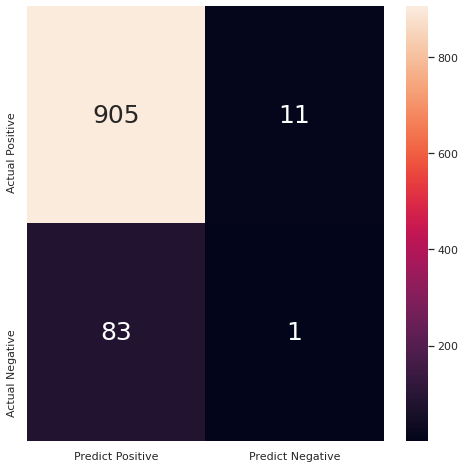

Results: Accuracy 0.906
         F1       0.021 
         MCC     -0.000


In [5]:
np.random.seed(2021)
has_cancer = (np.random.random(size=1000) > 0.9).astype(int)
predicted  = (np.random.random(size=1000) > 0.99).astype(int)#np.zeros(shape=1000, dtype=int)

cm = confusion_matrix(has_cancer, predicted)

df_cm = pd.DataFrame(cm, index = ["Actual Positive", "Actual Negative"],
                      columns = ["Predict Positive", "Predict Negative"])
plt.figure(figsize = (8,8))
axes = sns.heatmap(df_cm, annot=True, fmt='g', annot_kws={"size": 25})
plt.show()

accuracy = accuracy_score(has_cancer, predicted) 
f1       = f1_score(has_cancer, predicted) 
mcc      = matthews_corrcoef(has_cancer, predicted) 
print(f"Results: Accuracy {accuracy:0.3f}\n         F1       {f1:0.3f}",
      f"\n         MCC     { mcc:0.3f}")

# Part Two - Practice

> ### [UCI Machine Learning Repository: Iris](https://archive.ics.uci.edu/ml/datasets/Iris)
> ###  [Kaggle: Titanic Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) -- [Extra](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)

In [6]:
data = pd.read_csv('../data/kaggle-titanic-train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_filter_col = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

data_filter_col.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [8]:
data_filter_col['Sex'].replace(['female','male'],[1,0],inplace=True)

data_filter_col

/home/chcp/anaconda3/envs/dl/lib/python3.7/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,1
888,3,1,NaN,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [9]:
data_filter_col.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [10]:
data_filter_col = data_filter_col.dropna()

data_filter_col.shape

(714, 7)

In [11]:
X = data_filter_col[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_filter_col['Survived']

X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


In [12]:
corr = data_filter_col.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182,-0.359653
Sex,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994,0.538826
Age,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329,-0.017358
Parch,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119,0.093317
Fare,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000,0.268189
Survived,-0.359653,0.538826,-0.077221,-0.017358,0.093317,0.268189,1.000000


In [13]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [14]:
X_train, X_val, y_train, y_val = train_test_split(
                    X, y, test_size=0.30, random_state=2021)

In [15]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

predicted_val = tree.predict(X_val)
predicted_train = tree.predict(X_train)

acc_train = accuracy_score(y_train, predicted_train)
acc_val = accuracy_score(y_val, predicted_val)
print(f"Accuracy: Train {acc_train:0.3f} | Val {acc_val:0.3f}")

report = classification_report(y_val, predicted_val)
print(report)

Accuracy: Train 0.990 | Val 0.744
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       126
           1       0.69      0.69      0.69        89

    accuracy                           0.74       215
   macro avg       0.74      0.74      0.74       215
weighted avg       0.74      0.74      0.74       215



In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

predicted_val = knn.predict(X_val)
predicted_train = knn.predict(X_train)

acc_train = accuracy_score(y_train, predicted_train)
acc_val = accuracy_score(y_val, predicted_val)
print(f"Accuracy: Train {acc_train:0.3f} | Val {acc_val:0.3f}")

report = classification_report(y_val, predicted_val)
print(report)

Accuracy: Train 0.796 | Val 0.656
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       126
           1       0.59      0.53      0.56        89

    accuracy                           0.66       215
   macro avg       0.64      0.64      0.64       215
weighted avg       0.65      0.66      0.65       215



In [17]:
norm = Normalizer()

In [18]:
X_train = norm.fit_transform(X_train)
X_val   = norm.transform(X_val)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

predicted_val = knn.predict(X_val)
predicted_train = knn.predict(X_train)

acc_train = accuracy_score(y_train, predicted_train)
acc_val = accuracy_score(y_val, predicted_val)
print(f"Accuracy: Train {acc_train:0.3f} | Val {acc_val:0.3f}")

report = classification_report(y_val, predicted_val)
print(report)

Accuracy: Train 0.820 | Val 0.721
              precision    recall  f1-score   support

           0       0.74      0.82      0.77       126
           1       0.69      0.58      0.63        89

    accuracy                           0.72       215
   macro avg       0.71      0.70      0.70       215
weighted avg       0.72      0.72      0.72       215

